# Exploratory data analysis (EDA) of apartments data

## Libraries and settings

In [375]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_04


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [376]:
# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv")[['web-scraper-order',
                                                        'address_raw',
                                                        'lat',
                                                        'lon',
                                                        'bfs_number',
                                                        'bfs_name',
                                                        'rooms', 
                                                        'area', 
                                                        'luxurious', 
                                                        'price', 
                                                        'price_per_m2',
                                                        'pop',
                                                        'pop_dens',
                                                        'emp',
                                                        'frg_pct',
                                                        'mean_taxable_income']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49.0,0,1441.0,29.41,12286,1221.272366,5053.0,24.841283,65362.042683
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111.0,0,2600.0,23.42,12286,1221.272366,5053.0,24.841283,65362.042683
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58.0,0,1490.0,25.69,12286,1221.272366,5053.0,24.841283,65362.042683
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118.0,0,3240.0,27.46,12286,1221.272366,5053.0,24.841283,65362.042683
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66.0,0,1450.0,21.97,12286,1221.272366,5053.0,24.841283,65362.042683


### Quantiles original values

In [377]:
df_orig[['price','rooms', 'area', 'price_per_m2', 'pop_dens']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,price,rooms,area,price_per_m2,pop_dens
0.05,1337.00,1.00,26.00,17.90,336.03
0.10,1492.50,1.50,41.50,20.02,525.66
0.25,1842.25,2.50,63.00,23.30,1044.63
0.50,2391.00,3.50,86.00,27.95,1662.60
0.75,3056.75,4.50,108.75,38.12,4778.99
0.90,3960.00,4.75,140.50,52.78,4778.99
0.95,4957.50,5.50,163.75,67.33,4778.99


### Filter apartments

In [378]:
# Filter apartments (replace '<= 5000' by the respective operator and quantile)
df = df_orig.loc[df_orig['pop_dens'] <= 5000]

### Shape (number of rows and colums)

In [379]:
# Number of rows and columns
print(df.shape)

(786, 16)


### Data types

In [380]:
df.dtypes

web-scraper-order       object
address_raw             object
lat                    float64
lon                    float64
bfs_number               int64
bfs_name                object
rooms                  float64
area                   float64
luxurious                int64
price                  float64
price_per_m2           float64
pop                      int64
pop_dens               float64
emp                    float64
frg_pct                float64
mean_taxable_income    float64
dtype: object

### Summary statistics of numeric variables

In [381]:
df.describe()

,lat,lon,bfs_number,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,47.407331,8.600386,186.862595,3.421756,92.426209,0.012723,2649.339695,33.336489,161145.898219,2503.950703,177328.709924,27.771168,80631.662280
std,0.085343,0.117298,81.404652,1.304543,75.786527,0.112146,1289.074423,17.141739,186630.497367,1748.039181,223745.725478,7.592012,14393.861209
min,47.195290,8.367652,1.000000,1.000000,8.000000,0.000000,10.000000,0.040000,698.000000,87.959866,129.000000,7.547170,62000.541872
25%,47.361061,8.518511,121.000000,2.500000,63.000000,0.000000,1842.250000,23.302500,8775.000000,1044.628957,3460.000000,24.535004,71059.805603
50%,47.395105,8.562069,230.000000,3.500000,86.000000,0.000000,2391.000000,27.950000,27746.000000,1662.597326,19226.000000,28.059994,82404.831614
75%,47.481115,8.710458,261.000000,4.500000,108.750000,0.000000,3056.750000,38.125000,420217.000000,4778.994655,491193.000000,32.458468,82932.737704
max,47.693893,8.915933,298.000000,8.500000,1633.000000,1.000000,9950.000000,149.900000,420217.000000,4778.994655,491193.000000,46.226483,174434.537050


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [382]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('Area:',
      'Count:', round(df.area.count(), 1),
      'Min:', round(df.area.min(), 1),
      'Max:', round(df.area.max(), 1),
      'Mean:', round(df.area.mean(), 1),
      'Median:', round(df.area.median(), 1),
      'Std:', round(df.area.std(), 1))

Price: Count: 786 Min: 10.0 Max: 9950.0 Mean: 2649.3 Median: 2391.0 Std: 1289.1
Area: Count: 786 Min: 8.0 Max: 1633.0 Mean: 92.4 Median: 86.0 Std: 75.8


### Skewness

In [383]:
df[['price','rooms', 'area']].skew()

price     2.093405
rooms     0.209733
area     12.529695
dtype: float64

### Kurtosis

In [384]:
df[['price','rooms', 'area']].kurtosis()

price      6.668070
rooms      0.085123
area     232.607355
dtype: float64

### With Outlines

In [385]:
df.describe()

,lat,lon,bfs_number,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,47.407331,8.600386,186.862595,3.421756,92.426209,0.012723,2649.339695,33.336489,161145.898219,2503.950703,177328.709924,27.771168,80631.662280
std,0.085343,0.117298,81.404652,1.304543,75.786527,0.112146,1289.074423,17.141739,186630.497367,1748.039181,223745.725478,7.592012,14393.861209
min,47.195290,8.367652,1.000000,1.000000,8.000000,0.000000,10.000000,0.040000,698.000000,87.959866,129.000000,7.547170,62000.541872
25%,47.361061,8.518511,121.000000,2.500000,63.000000,0.000000,1842.250000,23.302500,8775.000000,1044.628957,3460.000000,24.535004,71059.805603
50%,47.395105,8.562069,230.000000,3.500000,86.000000,0.000000,2391.000000,27.950000,27746.000000,1662.597326,19226.000000,28.059994,82404.831614
75%,47.481115,8.710458,261.000000,4.500000,108.750000,0.000000,3056.750000,38.125000,420217.000000,4778.994655,491193.000000,32.458468,82932.737704
max,47.693893,8.915933,298.000000,8.500000,1633.000000,1.000000,9950.000000,149.900000,420217.000000,4778.994655,491193.000000,46.226483,174434.537050


### Extreme values

In [386]:
# Low costs apartments
df[df['price_per_m2'] <= 10]





,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
183,1693998317-653,"8001 Zürich, ZH",47.374966,8.543989,261,Zürich,4.5,137.0,0,16.0,0.12,420217,4778.994655,491193.0,32.458468,82932.737704
198,1693998326-702,"Hohenbühlstrasse 7, 8032 Zürich, ZH",47.366306,8.551867,261,Zürich,5.5,183.0,0,10.0,0.05,420217,4778.994655,491193.0,32.458468,82932.737704
404,1693998205-39,"Binzigerstrasse 52, 8707 Uetikon am See, ZH",47.267185,8.689932,159,Uetikon am See,6.5,300.0,1,11.0,0.04,6201,1792.196532,1480.0,21.270763,118977.376698
511,1693998369-926,"Dorfstrasse 2, 8309 Nürensdorf, ZH",47.458389,8.638629,64,Nürensdorf,6.5,863.0,0,4500.0,5.21,5602,557.968127,1031.0,16.815423,99039.717665
584,1693998289-482,"Lärchenstrasse 6, 8442 Hettlingen, ZH",47.547836,8.717198,221,Hettlingen,6.0,1633.0,0,3900.0,2.39,3169,537.118644,702.0,9.056485,101569.727626
762,1693998280-447,"Grabenwiese 2, 8484 Weisslingen, ZH",47.426781,8.767586,180,Weisslingen,6.5,585.0,0,3250.0,5.56,3364,262.607338,886.0,10.434007,84173.291925


### Remove apartments with low price per m2

In [387]:
df = df.loc[df['price_per_m2'] >= 10]

df

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49.0,0,1441.0,29.41,12286,1221.272366,5053.0,24.841283,65362.042683
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111.0,0,2600.0,23.42,12286,1221.272366,5053.0,24.841283,65362.042683
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58.0,0,1490.0,25.69,12286,1221.272366,5053.0,24.841283,65362.042683
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118.0,0,3240.0,27.46,12286,1221.272366,5053.0,24.841283,65362.042683
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66.0,0,1450.0,21.97,12286,1221.272366,5053.0,24.841283,65362.042683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,1693998373-942,"Dorfstr. 17, 8906 Bonstetten, ZH",47.314835,8.469243,3,Bonstetten,4.5,104.0,0,2055.0,19.76,5572,749.932705,1014.0,16.564968,88927.698145
782,1693998364-896,"Langenmattstrasse 14, 8617 Mönchaltorf, ZH",47.315971,8.719728,196,Mönchaltorf,4.5,98.0,0,1950.0,19.90,3898,513.570487,1360.0,17.162648,78699.937422
783,1693998369-919,"Oberalbis 10, 8915 Hausen am Albis, ZH",47.252140,8.530311,4,Hausen am Albis,5.5,175.0,0,3720.0,21.26,3751,275.808824,1021.0,16.022394,86300.455137
784,1693998373-960,"Isikerstrasse 26, 8335 Hittnau, ZH",47.370026,8.819698,173,Hittnau,4.5,130.0,0,2400.0,18.46,3664,282.934363,783.0,7.669214,77454.523667


In [388]:
# Very expansive apartments
df[df['price_per_m2'] <= 100]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49.0,0,1441.0,29.41,12286,1221.272366,5053.0,24.841283,65362.042683
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111.0,0,2600.0,23.42,12286,1221.272366,5053.0,24.841283,65362.042683
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58.0,0,1490.0,25.69,12286,1221.272366,5053.0,24.841283,65362.042683
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118.0,0,3240.0,27.46,12286,1221.272366,5053.0,24.841283,65362.042683
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66.0,0,1450.0,21.97,12286,1221.272366,5053.0,24.841283,65362.042683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,1693998373-942,"Dorfstr. 17, 8906 Bonstetten, ZH",47.314835,8.469243,3,Bonstetten,4.5,104.0,0,2055.0,19.76,5572,749.932705,1014.0,16.564968,88927.698145
782,1693998364-896,"Langenmattstrasse 14, 8617 Mönchaltorf, ZH",47.315971,8.719728,196,Mönchaltorf,4.5,98.0,0,1950.0,19.90,3898,513.570487,1360.0,17.162648,78699.937422
783,1693998369-919,"Oberalbis 10, 8915 Hausen am Albis, ZH",47.252140,8.530311,4,Hausen am Albis,5.5,175.0,0,3720.0,21.26,3751,275.808824,1021.0,16.022394,86300.455137
784,1693998373-960,"Isikerstrasse 26, 8335 Hittnau, ZH",47.370026,8.819698,173,Hittnau,4.5,130.0,0,2400.0,18.46,3664,282.934363,783.0,7.669214,77454.523667


### Remove very expensive apartments

In [389]:
# Very expansive apartments
df = df.loc[df['price_per_m2'] >= 100]

### Get a list of categories of categorical variable

In [390]:
np.array(pd.Categorical(df['bfs_name']).categories)

array(['Zürich'], dtype=object)

### Without Outliners

In [391]:
df.describe()

,lat,lon,bfs_number,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
count,7.000000,7.000000,7.0,7.000000,7.000000,7.0,7.000000,7.000000,7.0,7.000000e+00,7.0,7.000000,7.000000e+00
mean,47.365705,8.537363,261.0,1.357143,21.857143,0.0,2686.285714,122.451429,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04
std,0.011532,0.016315,0.0,0.377964,9.581729,0.0,1242.980922,19.163417,0.0,9.823666e-13,0.0,0.000000,1.571786e-11
min,47.355923,8.520324,261.0,1.000000,10.000000,0.0,1120.000000,100.000000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04
25%,47.355923,8.523772,261.0,1.000000,13.000000,0.0,1499.500000,105.830000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04
50%,47.362282,8.530180,261.0,1.500000,25.000000,0.0,3490.000000,126.330000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04
75%,47.373707,8.554498,261.0,1.500000,30.000000,0.0,3652.500000,134.635000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04
max,47.382469,8.554498,261.0,2.000000,32.000000,0.0,3890.000000,149.900000,420217.0,4.778995e+03,491193.0,32.458468,8.293274e+04


## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [392]:
pd.crosstab(df['luxurious'], df['rooms'])

rooms,1.0,1.5,2.0
luxurious,,,
0,3,3,1


### Pivot tables

In [393]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price', 'price_per_m2', 'area', 'luxurious']],
               index=['rooms', 'luxurious'],
               values=['price', 'price_per_m2', 'area'],
               aggfunc=(np.mean, 'count'))

area            price              price_per_m2            
                count       mean count         mean        count        mean
rooms luxurious                                                             
1.0   0             3  12.000000     3  1373.000000            3  117.240000
1.5   0             3  28.333333     3  3723.333333            3  131.866667
2.0   0             1  32.000000     1  3515.000000            1  109.840000

### Correlation matrix

In [394]:
corr = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov().corr()
corr

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.000000,1.000000,0.999991,0.998618,-0.264331,NaN
area,1.000000,1.000000,0.999993,0.998643,-0.264330,NaN
price,0.999991,0.999993,1.000000,0.998830,-0.265115,NaN
price_per_m2,0.998618,0.998643,0.998830,1.000000,-0.275477,NaN
pop_dens,-0.264331,-0.264330,-0.265115,-0.275477,1.000000,NaN
frg_pct,NaN,NaN,NaN,NaN,NaN,NaN


### Covariance matrix

In [395]:
cov = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov()
cov

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.428571e-01,3.309524e+00,3.973810e+02,2.519048e-01,6.731613e-29,0.0
area,3.309524e+00,9.180952e+01,1.148971e+04,1.147190e+01,5.385290e-28,0.0
price,3.973810e+02,1.148971e+04,1.545002e+06,7.110073e+03,-6.893172e-26,0.0
price_per_m2,2.519048e-01,1.147190e+01,7.110073e+03,3.672365e+02,-1.938705e-26,0.0
pop_dens,6.731613e-29,5.385290e-28,-6.893172e-26,-1.938705e-26,9.650440e-25,0.0
frg_pct,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

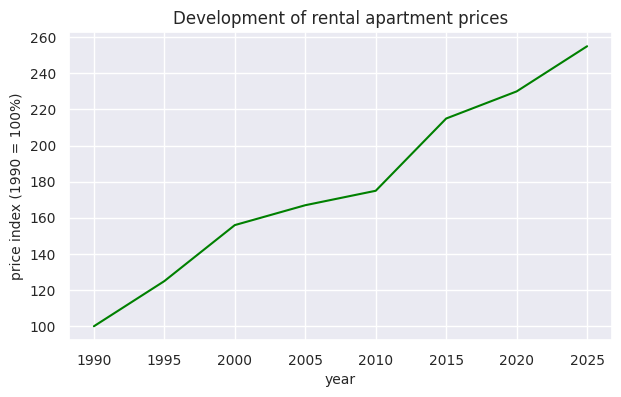

In [396]:
# Generate some useful values (time series)
x = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
y = [100, 125, 156, 167, 175, 215, 230, 255]

# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of rental apartment prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Boxplot (seaborn)

<Axes: xlabel='area'>

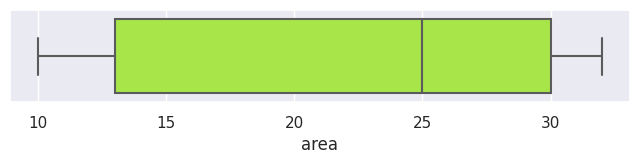

In [397]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['area'], color="greenyellow")

### Histogram  (matplotlib)

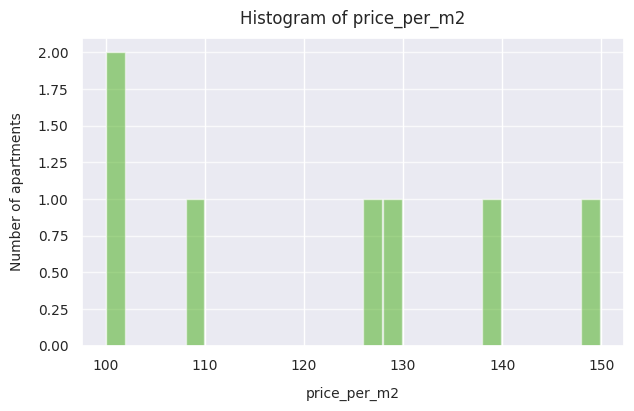

In [398]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['price_per_m2'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price_per_m2', fontsize=10, labelpad=10)
plt.ylabel('Number of apartments', fontsize=10, labelpad=10)
plt.title('Histogram of price_per_m2', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn)

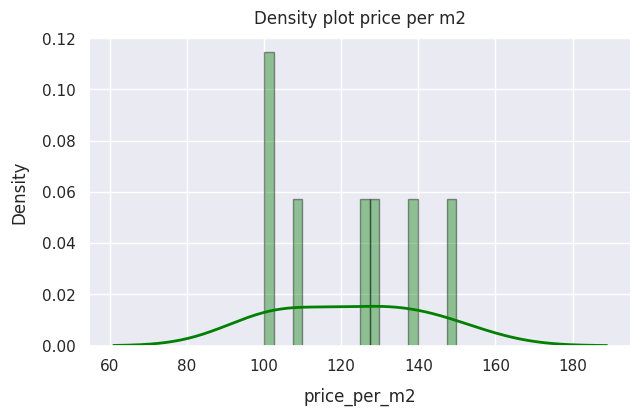

In [399]:
plt.figure(figsize=(7,4))
sns.distplot(df['price_per_m2'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot price per m2', fontsize=12, pad=10)
plt.xlabel('price_per_m2', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

     area       var
185  10.0 -1.237474
107  11.0 -1.133109
154  15.0 -0.715648
21   25.0  0.328005
20   30.0  0.849832
171  30.0  0.849832
11   32.0  1.058562


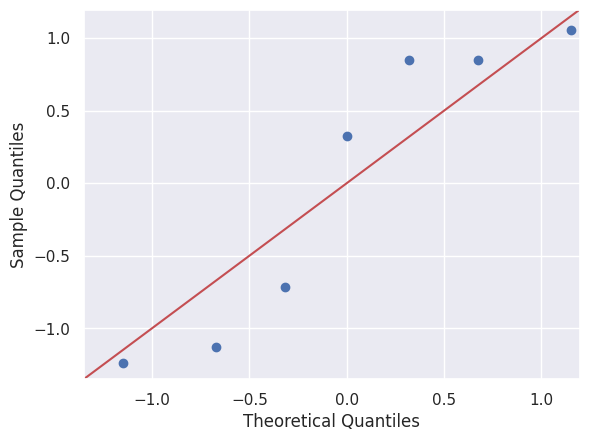

In [400]:
# Variable (standardized)
x = 'area'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['area', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

### Barchart  (matplotlib)

In [401]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
index

[2.0, 1.5, 1.0]

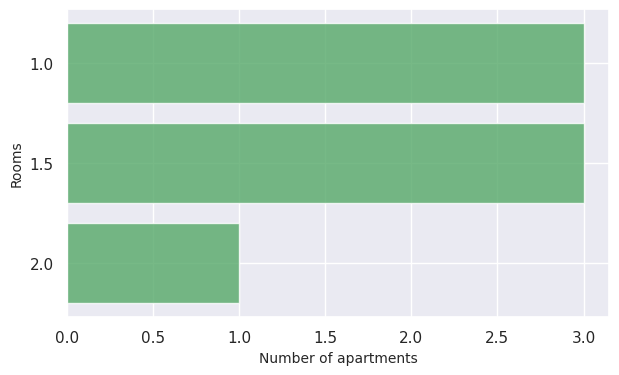

In [402]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of apartments', fontsize=10)
ax.set_ylabel('Rooms', fontsize=10)

# Show graph
plt.show()

### Piechart (matplotlib)

ValueError: 'explode' must be of length 'x'

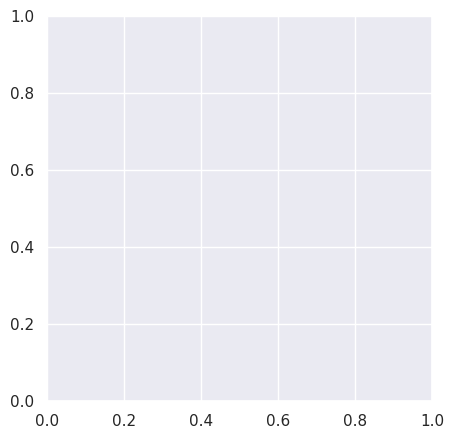

In [403]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df.rooms.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0.0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

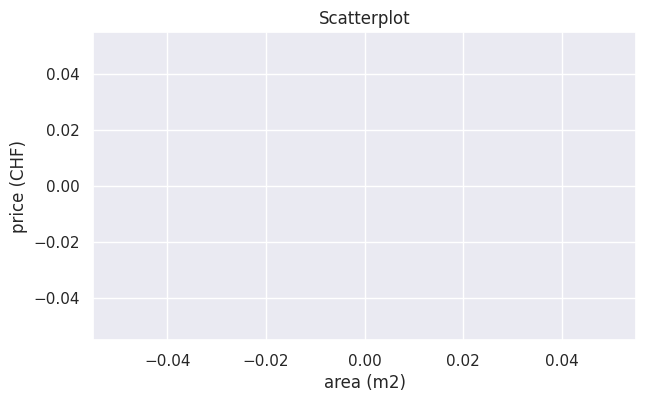

In [ ]:
plt.figure(figsize=(7,4))
plt.scatter(df['area'], 
           df['price'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')
plt.show()

### Scatterplot (matplotlib) with regression line

(0, 17)


TypeError: expected non-empty vector for x

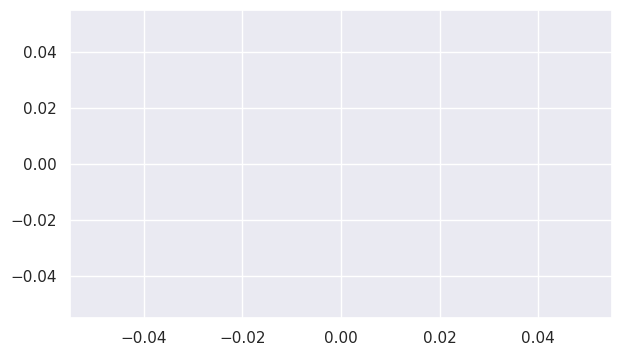

In [ ]:
# Subset
df_sub = df.loc[(df.price >= 1000)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.area, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.area, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.area, 
         b*df_sub.area + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('area', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

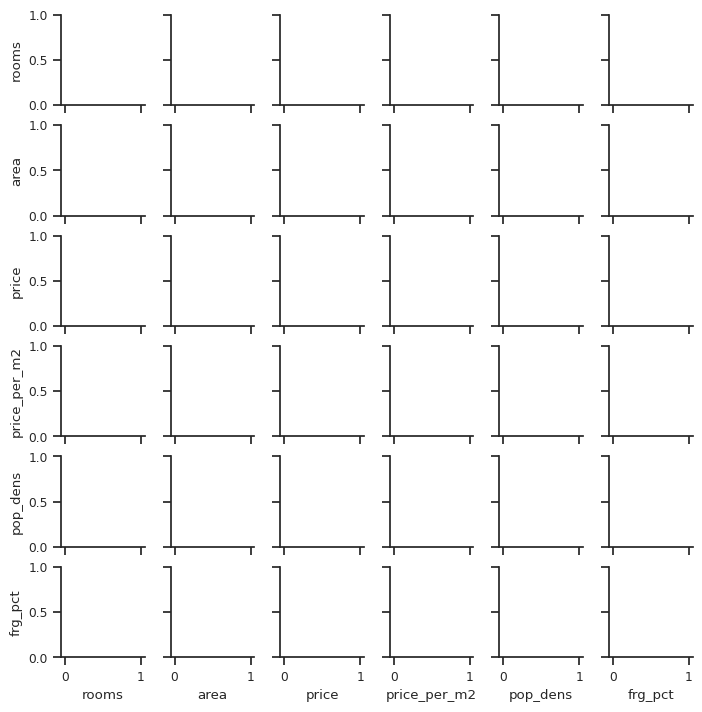

In [ ]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

(0, 17)


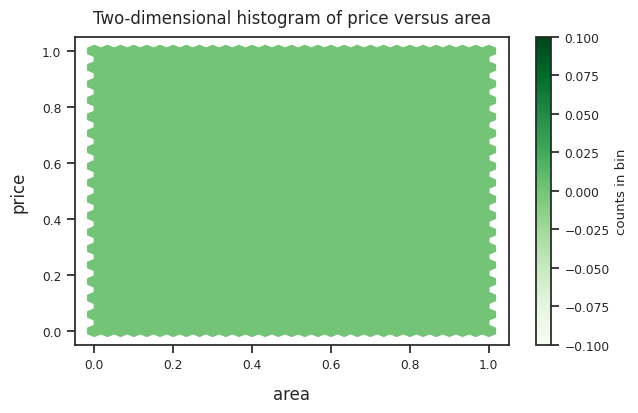

In [ ]:
# Subset
df_sub = df.loc[(df.price <= 6000) & (df.area <= 200)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.area, df_sub.price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('area', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus area', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

<Axes: >

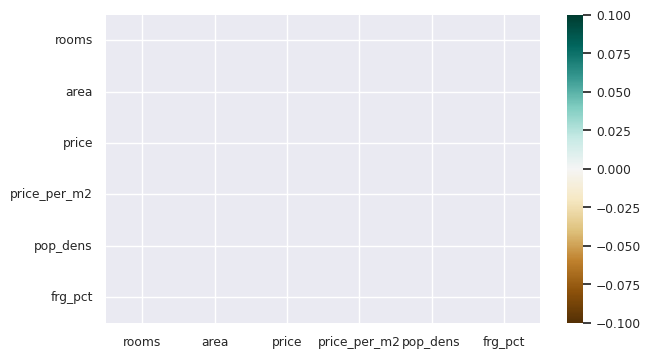

In [ ]:
# Set font size for plot
sns.set(font_scale=0.8)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']].corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

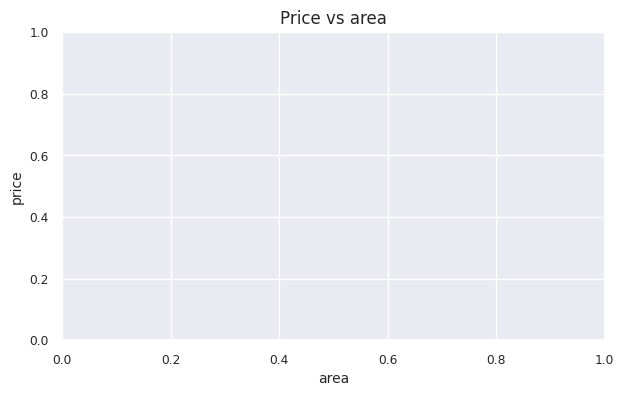

In [ ]:
# Subset of df
df_sub = df.loc[(df['rooms'] >= 2.5) & (df['rooms'] <= 4.5)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="area", 
                     y="price",
                     size="rooms", # determines bubble size
                     hue="pop_dens",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs area', fontsize = 12)
ax.set_xlabel('area', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 5.15.0-1041-azure
Datetime: 2023-10-10 19:13:27
Python Version: 3.10.13
-----------------------------------
